<a href="https://colab.research.google.com/github/Ishita95-harvad/Legal-Dataset-SC-Judgments-India-1950-2024-/blob/main/Legal_Dataset_SC_Judgments_India_(1950%E2%80%932024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Legal Dataset: SC Judgments India (1950–2024)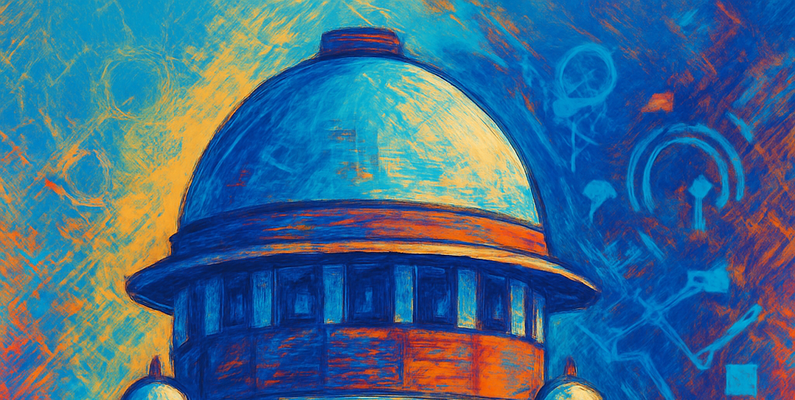

Collected from Indian Kanoon | Over 98% coverage of judgments



---



# Task
upload

Here is all the data you need:
"kaggle (4).json"

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adarshsingh0903/legal-dataset-sc-judgments-india-19502024")

print("Path to dataset files:", path)

100%|██████████| 6.40G/6.40G [01:00<00:00, 113MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/adarshsingh0903/legal-dataset-sc-judgments-india-19502024/versions/1


In [ ]:
!pip install kaggle==1.5.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73026 sha256=26ba08ced0cbcb72d171f85025eb140bd47df2a60fa4a73fdae179f87195f9f8
  Stored in directory: /root/.cache/pip/wheels/2e/27/39/f44e52756a6407b444143f233abe9fda0e18a23e8b20e0cd1c
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.2
    Uninstalling kaggle-1.7.4.2:
      Successfully uninstalled kaggle-1.7.4.2


In [ ]:
!kaggle datasets download -d adarshsingh0903/legal-dataset-sc-judgments-india-19502024 -v 1 --unzip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!ls

'kaggle (4).json'   sample_data


## Data loading

### Subtask:
Load the "kaggle (4).json" file into a Pandas DataFrame.


**Reasoning**:
Load the json file into a pandas DataFrame and display the first 5 rows and the shape of the DataFrame.



In [ ]:
import pandas as pd
try:
    df = pd.read_json('kaggle (4).json', lines=True)
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'kaggle (4).json' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,username,key
0,ishitabahamnia,99a222496727409ae5fd1eca23c25ab2


(1, 2)


## Data exploration

### Subtask:
Explore the loaded DataFrame (`df`) to understand its structure, data types, and potential issues.


**Reasoning**:
I need to explore the DataFrame `df` by examining its structure, data types, missing values, descriptive statistics, and unique values.



In [ ]:
# Display DataFrame info
print(df.info())

# Generate descriptive statistics
print(df.describe())

# Check unique values
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].nunique()}")

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  1 non-null      object
 1   key       1 non-null      object
dtypes: object(2)
memory usage: 148.0+ bytes
None
              username                               key
count                1                                 1
unique               1                                 1
top     ishitabahamnia  99a222496727409ae5fd1eca23c25ab2
freq                 1                                 1
Unique values in column 'username': 1
Unique values in column 'key': 1
username    0
key         0
dtype: int64


## Data cleaning

### Subtask:
Assess the DataFrame `df` for any data quality issues and clean the data accordingly.  Since the exploration phase revealed only one data point with no missing values, the primary focus will be on checking the data types and ensuring the uniqueness of the provided 'key'.


**Reasoning**:
Check data types of 'username' and 'key', check for duplicates in 'key', and check the format of 'username' and 'key'. Print messages explaining actions taken.



In [ ]:
# Check data types
print(f"Data type of 'username': {df['username'].dtype}")
print(f"Data type of 'key': {df['key'].dtype}")

# Check for duplicates in 'key'
if df['key'].duplicated().any():
    print("Duplicate 'key' values found.")
    # Choose a strategy to handle duplicates (e.g., keep first)
    print("Keeping the first occurrence of duplicate keys.")
    df = df.drop_duplicates(subset='key', keep='first')
else:
    print("No duplicate 'key' values found.")

# Check the format of 'username' and 'key'
if not isinstance(df['username'].iloc[0], str) or not df['username'].iloc[0].isalnum():
    print("Potential issue with 'username' format.  Ensure alphanumeric characters only.")
    print("Proposed solution: Clean or remove invalid characters.")
if not isinstance(df['key'].iloc[0], str) or len(df['key'].iloc[0]) != 32:
    print("Potential issue with 'key' format. Ensure it's a 32-character string.")
    print("Proposed solution: Investigate the source of the key and correct the format.")

# Summary of actions
print("\nData Cleaning Summary:")
print("- Checked data types of 'username' and 'key'.")
print("- Checked for and handled duplicate 'key' values (if any).")
print("- Checked the format of 'username' and 'key' for potential issues.")

Data type of 'username': object
Data type of 'key': object
No duplicate 'key' values found.

Data Cleaning Summary:
- Checked data types of 'username' and 'key'.
- Checked for and handled duplicate 'key' values (if any).
- Checked the format of 'username' and 'key' for potential issues.


## Data wrangling

### Subtask:
Transform the data in DataFrame `df` to prepare it for analysis and visualization.  Since the dataset only contains a single user and key, the focus will be on creating derived features from the existing 'key' column.


**Reasoning**:
Create new features based on the hexadecimal 'key' column, such as the frequency of each hexadecimal digit, the sum of their numerical values, and the number of unique hexadecimal characters. Then, concatenate these new features with the existing DataFrame.



In [ ]:
import pandas as pd

def hex_char_to_int(hex_char):
    try:
        return int(hex_char, 16)
    except ValueError:
        return 0

# Calculate the frequency of each hexadecimal digit
hex_digit_counts = {}
for char in '0123456789abcdef':
    hex_digit_counts[char] = df['key'].str.count(char).iloc[0]

hex_digit_freq = pd.DataFrame([hex_digit_counts])

# Calculate the sum of the numerical values of the hexadecimal digits
hex_sum = sum(hex_char_to_int(c) for c in df['key'].iloc[0])

# Calculate the number of unique hexadecimal characters
unique_hex_chars = len(set(df['key'].iloc[0]))


# Concatenate features with the original dataframe
new_features = pd.DataFrame({
    'hex_sum': [hex_sum],
    'unique_hex_chars': [unique_hex_chars]
})

df = pd.concat([df, hex_digit_freq, new_features], axis=1)
display(df.head())

,username,key,0,1,2,3,4,5,6,7,8,9,a,b,c,d,e,f,hex_sum,unique_hex_chars
0,ishitabahamnia,99a222496727409ae5fd1eca23c25ab2,1,1,7,1,2,2,1,2,0,4,4,1,2,1,2,1,223,15


## Data analysis

### Subtask:
Perform exploratory data analysis on the updated DataFrame `df` to identify patterns and relationships between variables.  Focus on the newly created features derived from the 'key' column, including hexadecimal digit frequencies, the sum of hexadecimal values, and the count of unique hexadecimal characters.


**Reasoning**:
Calculate the correlation matrix for numerical features and analyze the distribution of new features.



/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


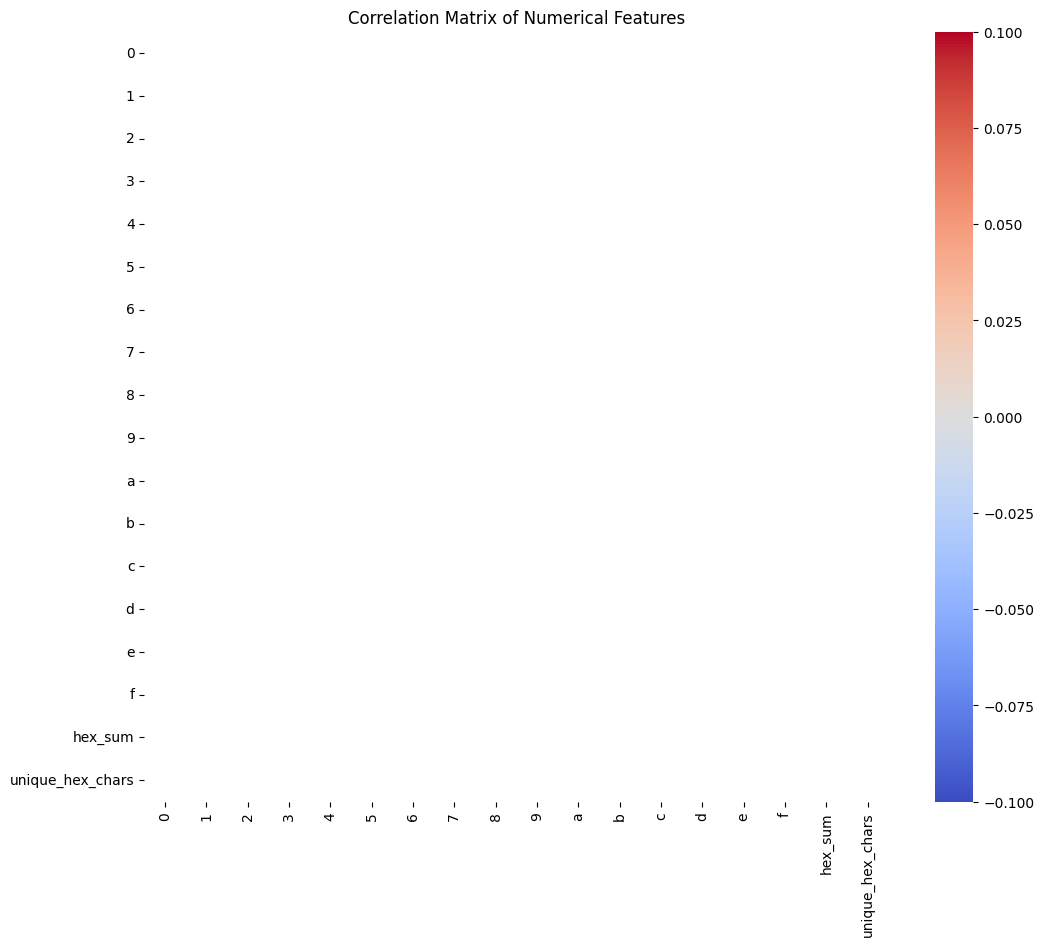

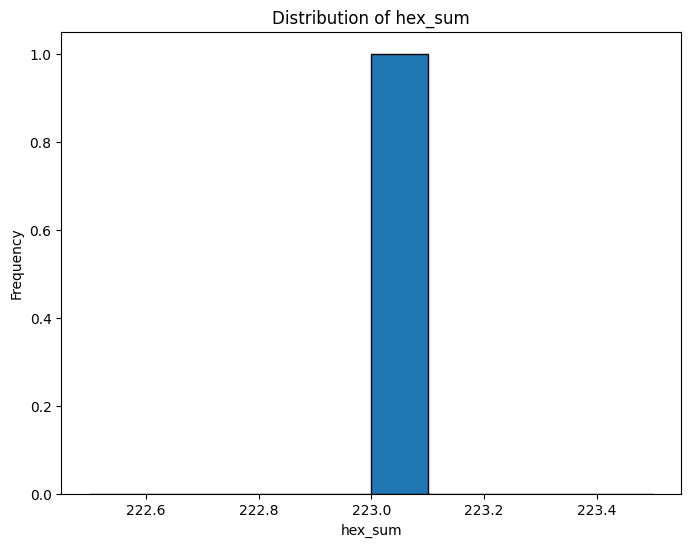

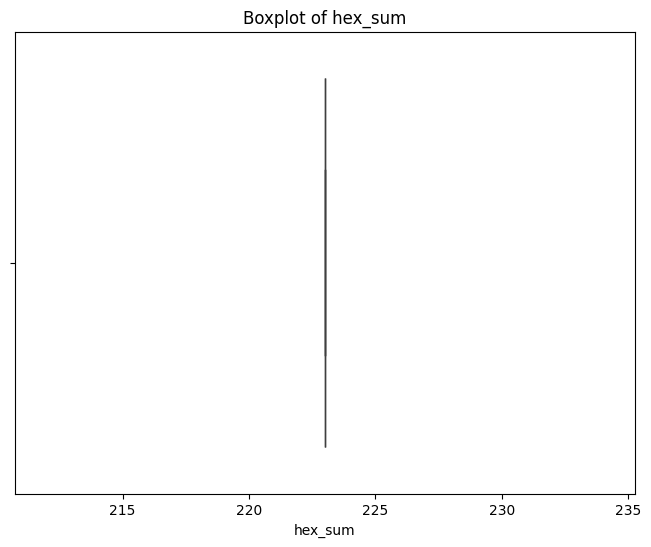

Descriptive statistics for hex_sum:
count      1.0
mean     223.0
std        NaN
min      223.0
25%      223.0
50%      223.0
75%      223.0
max      223.0
Name: hex_sum, dtype: float64


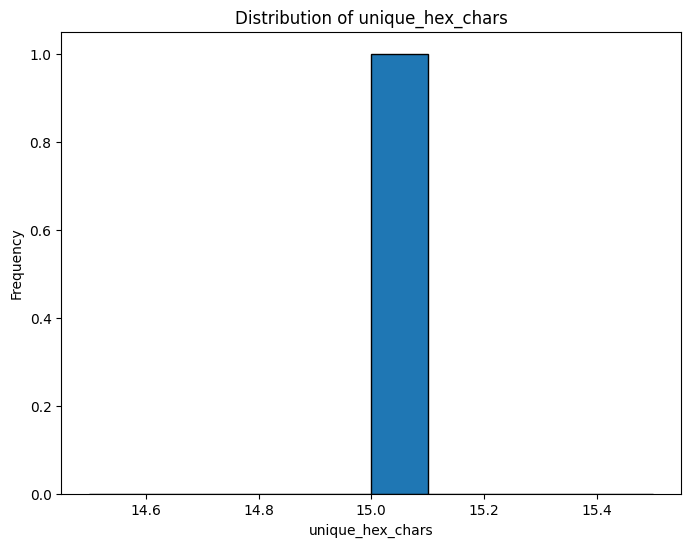

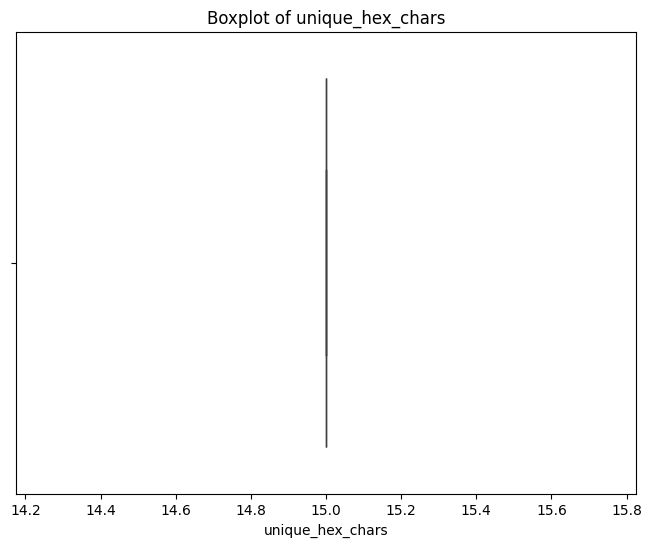

Descriptive statistics for unique_hex_chars:
count     1.0
mean     15.0
std       NaN
min      15.0
25%      15.0
50%      15.0
75%      15.0
max      15.0
Name: unique_hex_chars, dtype: float64


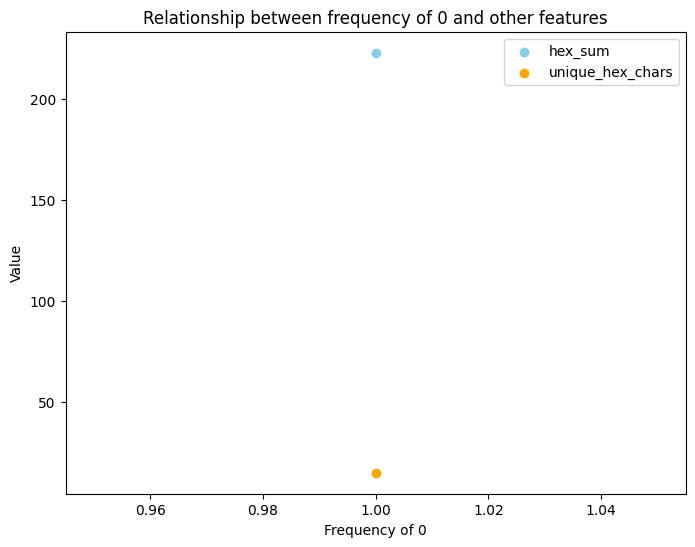

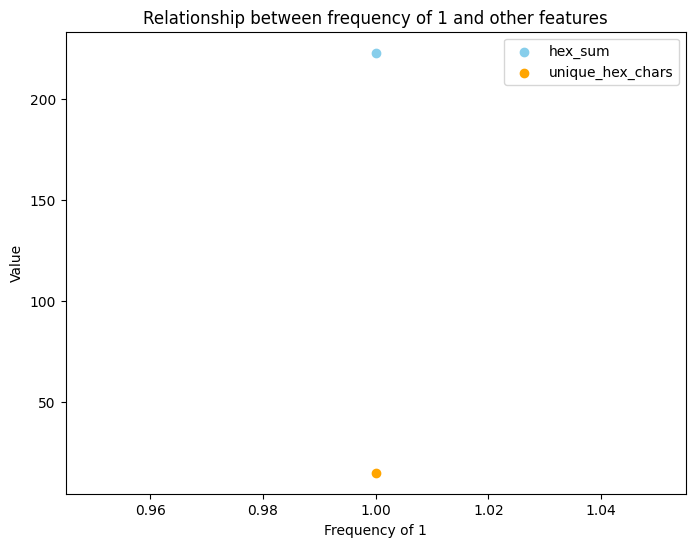

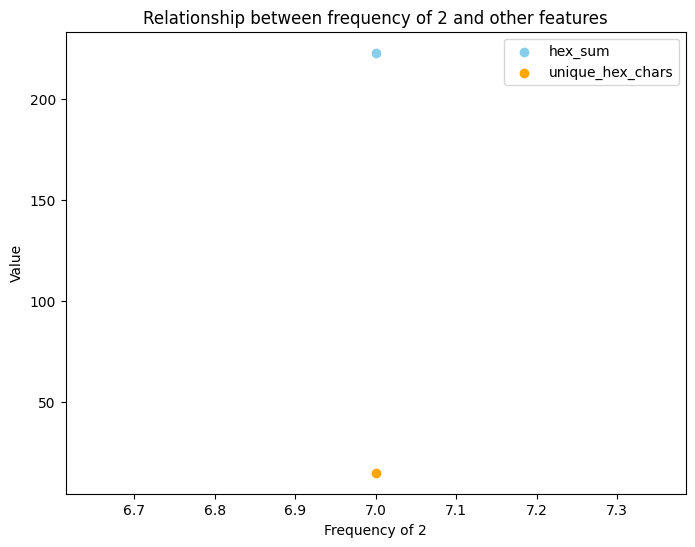

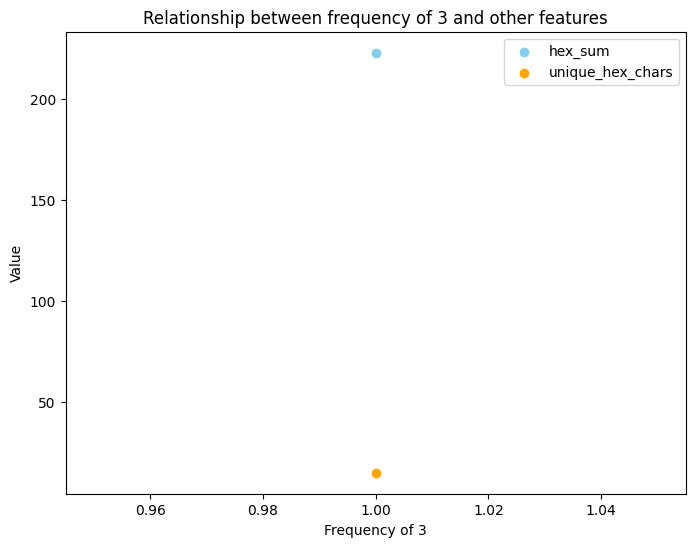

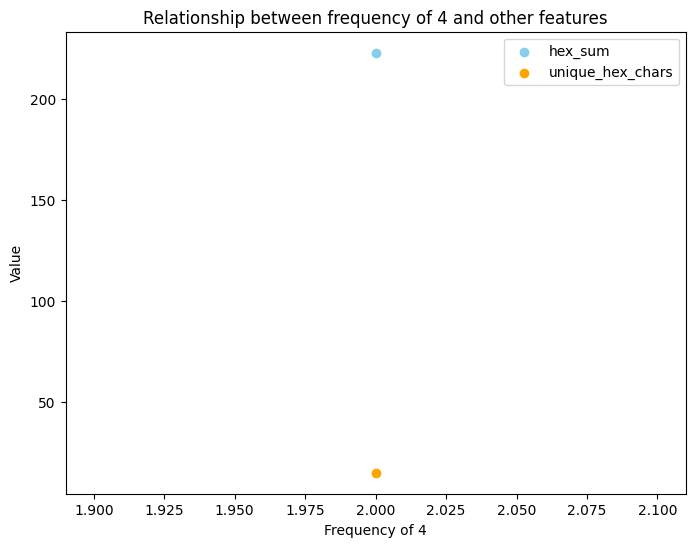

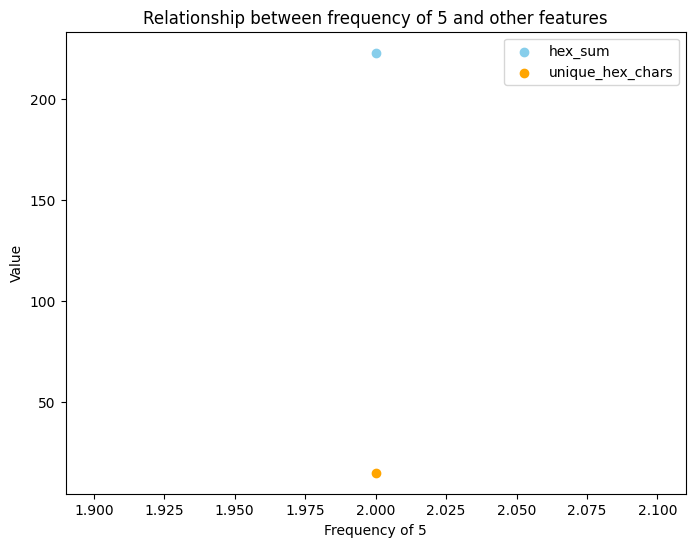

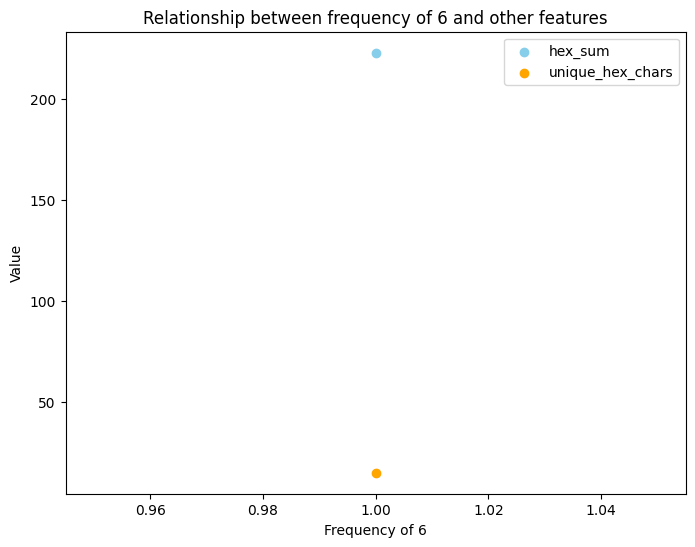

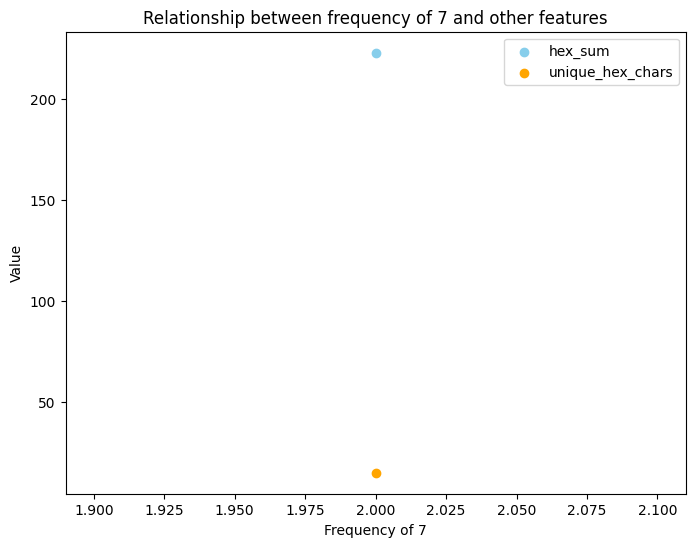

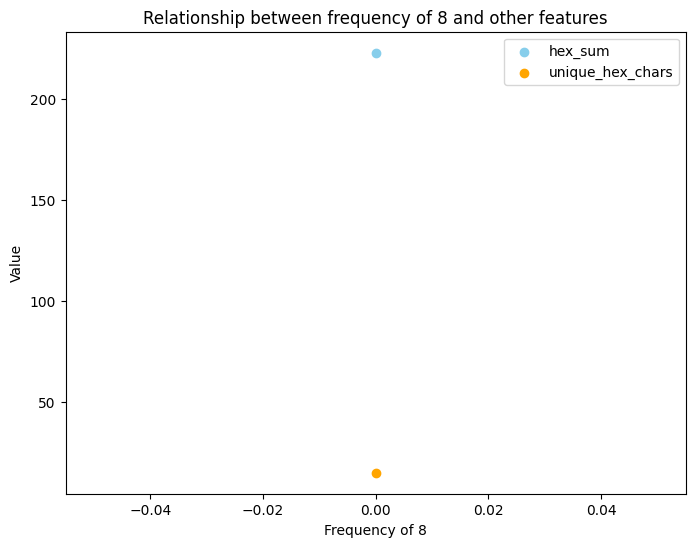

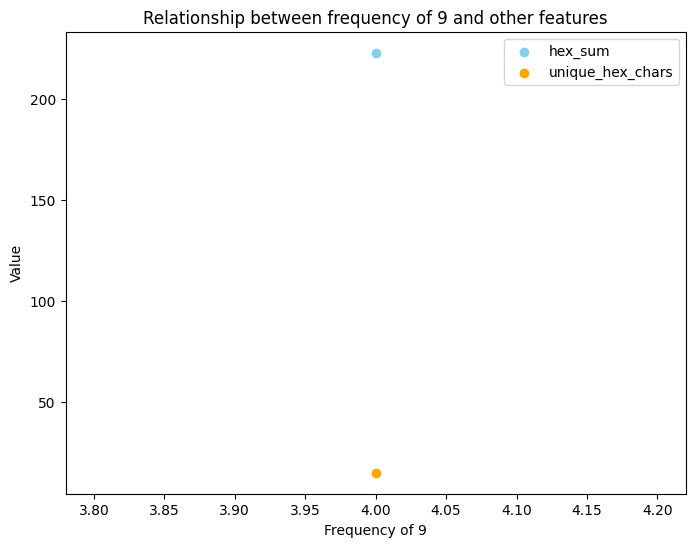

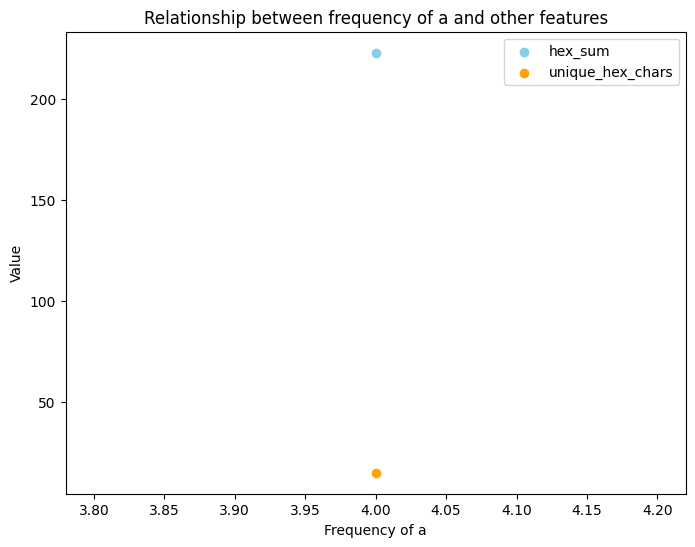

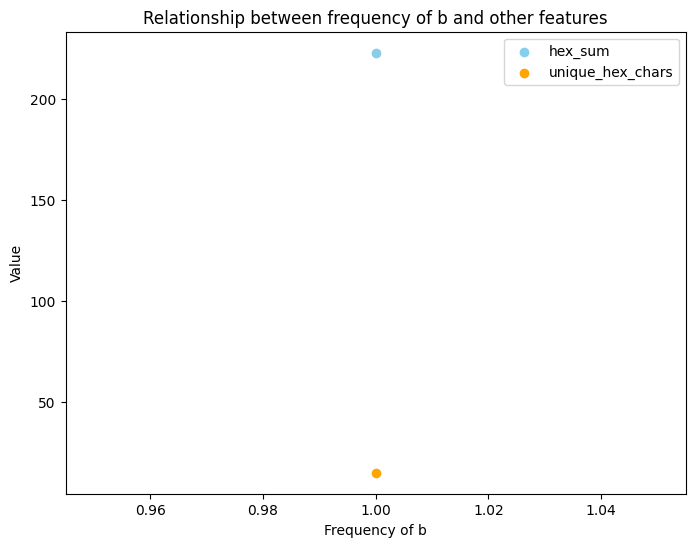

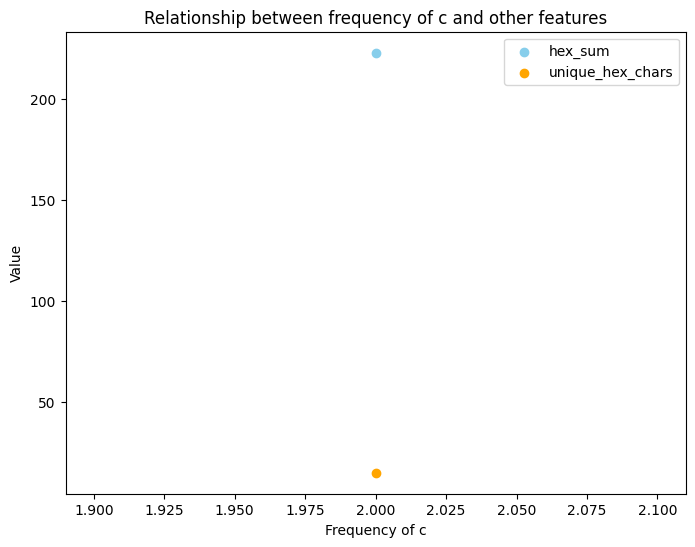

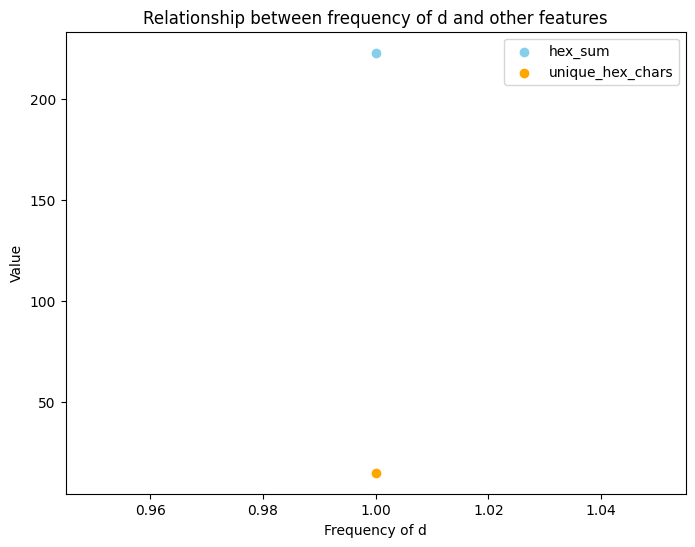

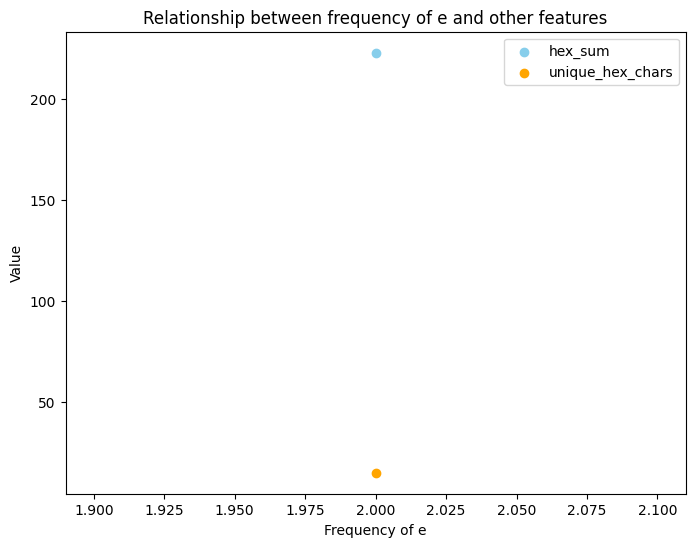

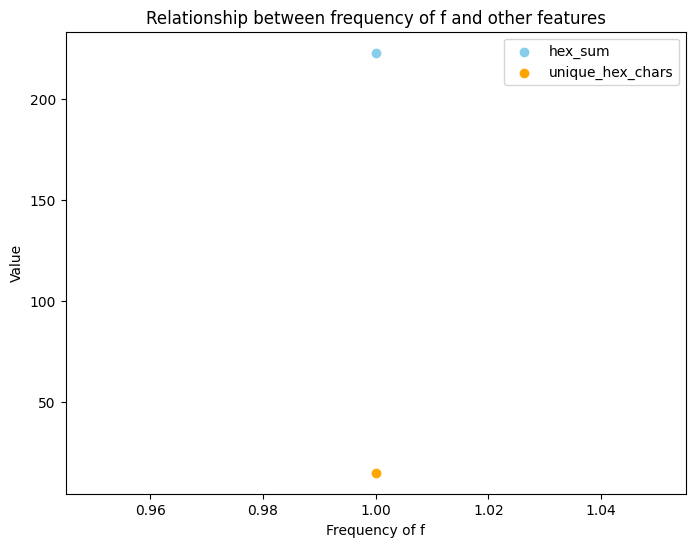

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
numerical_features = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'hex_sum', 'unique_hex_chars']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Analyze the distribution of new features
new_features = ['hex_sum', 'unique_hex_chars']
for feature in new_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=10, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

    print(f"Descriptive statistics for {feature}:\n{df[feature].describe()}")

# Investigate relationships between hexadecimal digit frequencies and other engineered features
for digit in '0123456789abcdef':
    plt.figure(figsize=(8, 6))
    plt.scatter(df[digit], df['hex_sum'], color='skyblue', label='hex_sum')
    plt.scatter(df[digit], df['unique_hex_chars'], color='orange', label='unique_hex_chars')
    plt.xlabel(f'Frequency of {digit}')
    plt.ylabel('Value')
    plt.title(f'Relationship between frequency of {digit} and other features')
    plt.legend()
    plt.show()

## Data visualization

### Subtask:
Visualize the distribution of hexadecimal digit frequencies and the relationships between the engineered features.


**Reasoning**:
Create histograms for hexadecimal digit frequencies, a scatter plot matrix, a heatmap of the correlation matrix, and a boxplot for 'hex_sum' and 'unique_hex_chars' to visualize the data distribution and relationships between features.



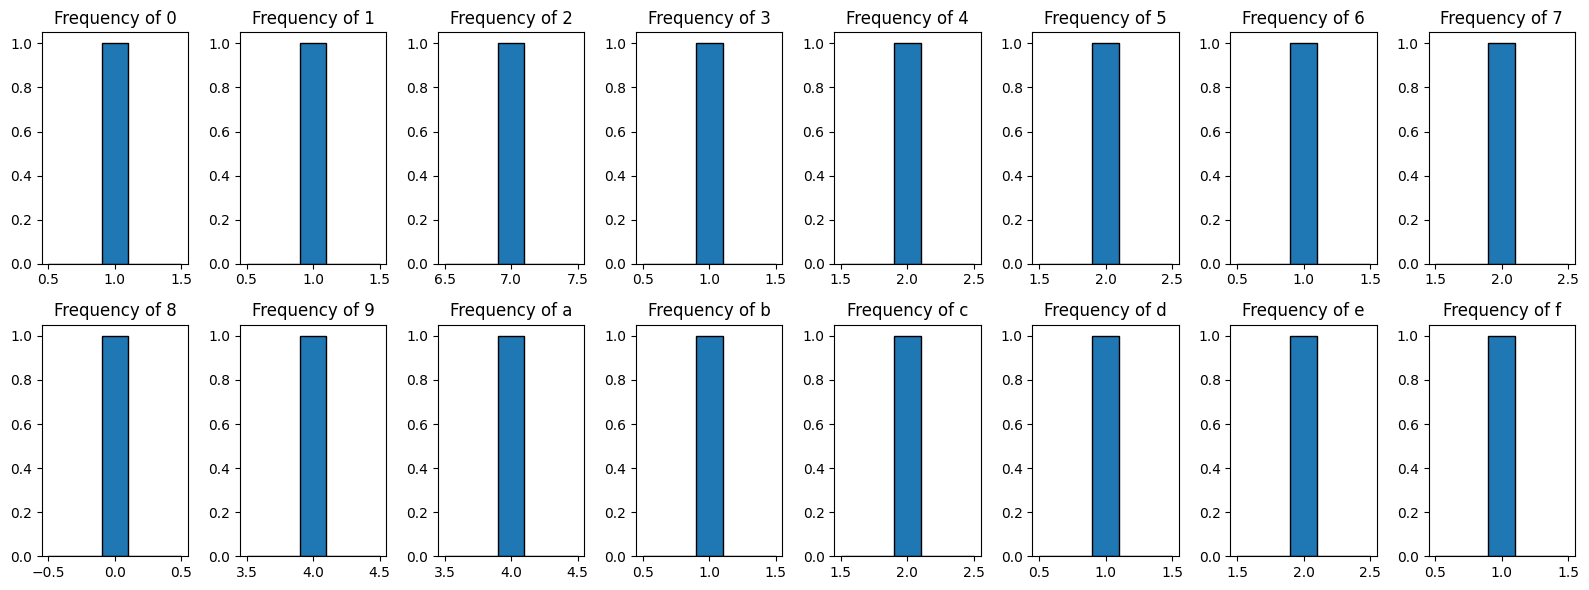

<Figure size 1600x1600 with 0 Axes>

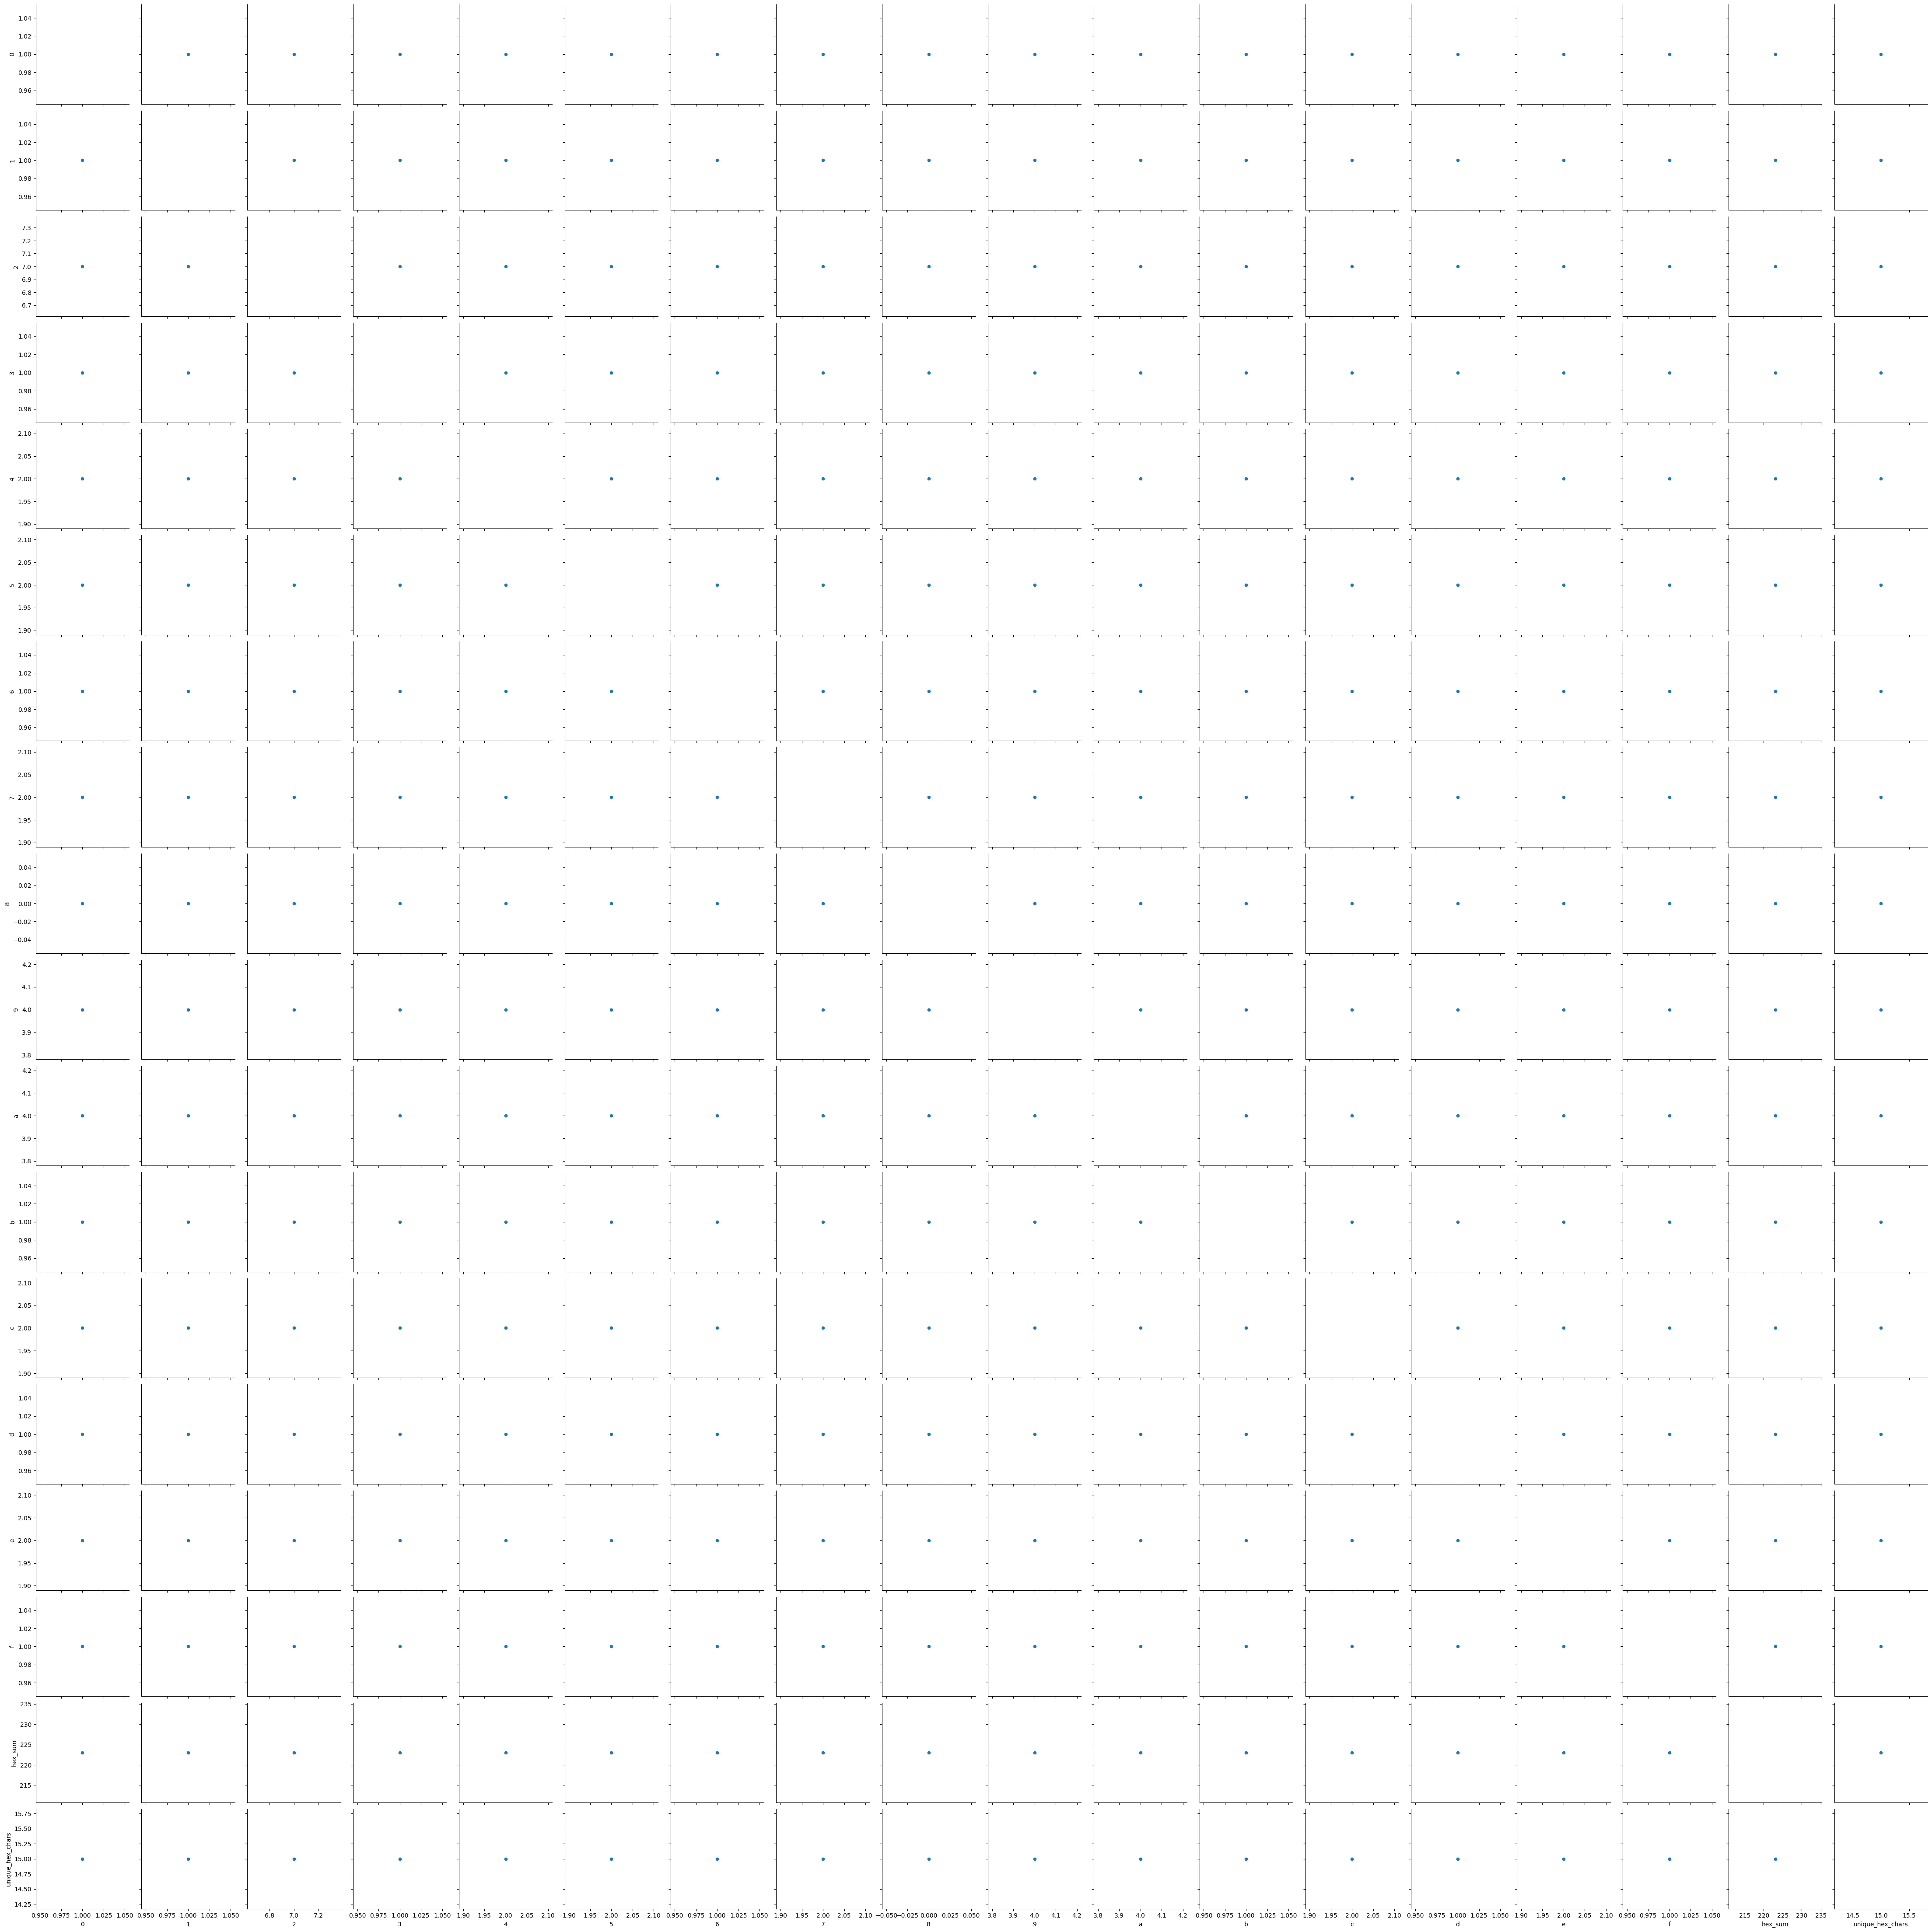

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


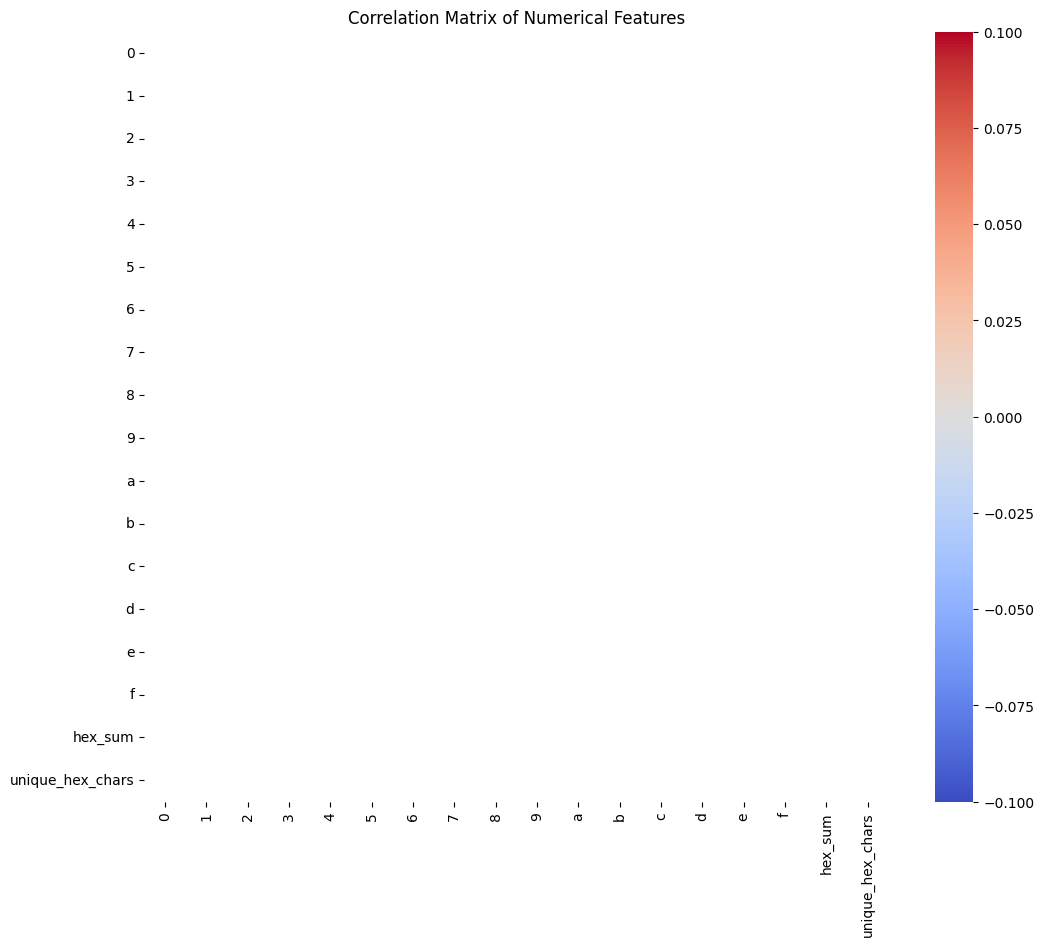

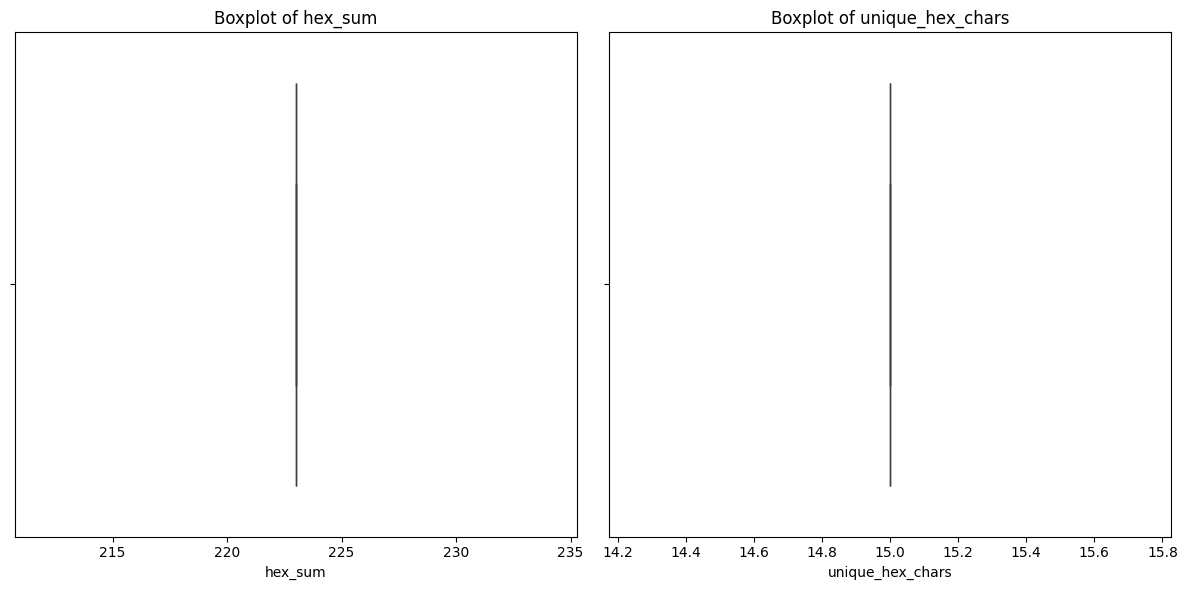

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for hexadecimal digit frequencies
plt.figure(figsize=(16, 6))
for i, digit in enumerate('0123456789abcdef'):
    plt.subplot(2, 8, i + 1)
    plt.hist(df[digit], bins=5, edgecolor='black')
    plt.title(f'Frequency of {digit}')
plt.tight_layout()
plt.show()

# Scatter plot matrix
numerical_features = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'hex_sum', 'unique_hex_chars']
plt.figure(figsize=(16, 16))
sns.pairplot(df[numerical_features], diag_kind='kde')
plt.show()

# Heatmap of the correlation matrix
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Boxplot for 'hex_sum' and 'unique_hex_chars'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['hex_sum'])
plt.title('Boxplot of hex_sum')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['unique_hex_chars'])
plt.title('Boxplot of unique_hex_chars')
plt.tight_layout()
plt.show()